In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Year': [2019, 2019, 2020, 2020, 2021, 2021],
    'Region': ['Dublin', 'South-West', 'Dublin', 'South-West', 'Dublin', 'South-West'],
    'Homeless_Adults': [4500, 1100, 4200, 1000, 3000, 900],
    'Accommodation_Type': [
        'Private Emergency Accommodation',
        'Supported Temporary Accommodation',
        'Private Emergency Accommodation',
        'Supported Temporary Accommodation',
        'Private Emergency Accommodation',
        'Supported Temporary Accommodation'
    ],
    'Count': [6000, 2000, 5800, 1900, 5500, 1800]
}

df = pd.DataFrame(data)
df

,Year,Region,Homeless_Adults,Accommodation_Type,Count
0,2019,Dublin,4500,Private Emergency Accommodation,6000
1,2019,South-West,1100,Supported Temporary Accommodation,2000
2,2020,Dublin,4200,Private Emergency Accommodation,5800
3,2020,South-West,1000,Supported Temporary Accommodation,1900
4,2021,Dublin,3000,Private Emergency Accommodation,5500
5,2021,South-West,900,Supported Temporary Accommodation,1800


In [7]:
display(df.describe())

,Year,Homeless_Adults,Count
count,6.000000,6.000000,6.000000
mean,2020.000000,2450.000000,3833.333333
std,0.894427,1667.033293,2124.774498
min,2019.000000,900.000000,1800.000000
25%,2019.250000,1025.000000,1925.000000
50%,2020.000000,2050.000000,3750.000000
75%,2020.750000,3900.000000,5725.000000
max,2021.000000,4500.000000,6000.000000


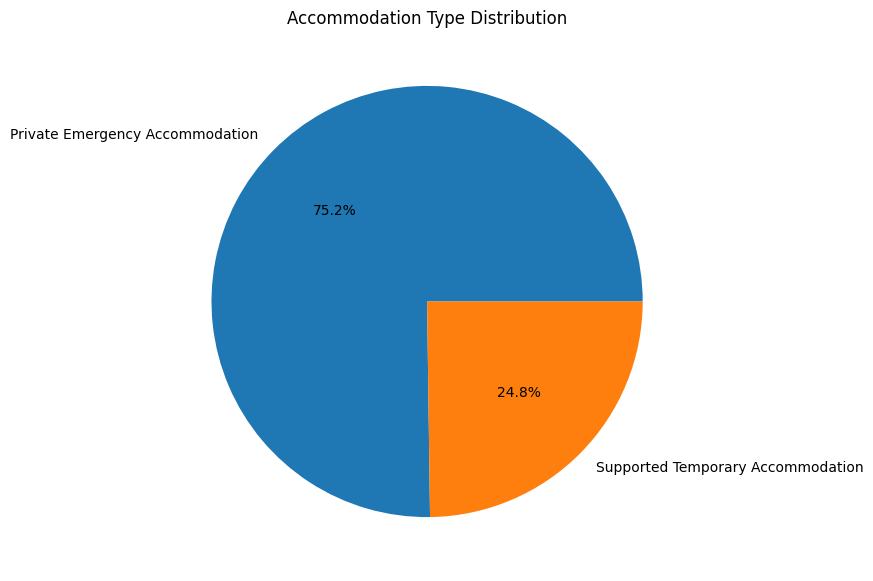

In [6]:
accom_totals = df.groupby('Accommodation_Type')['Count'].sum()
plt.figure(figsize=(7,7))
accom_totals.plot(kind='pie', autopct='%1.1f%%')
plt.title('Accommodation Type Distribution')
plt.ylabel('')
plt.show()

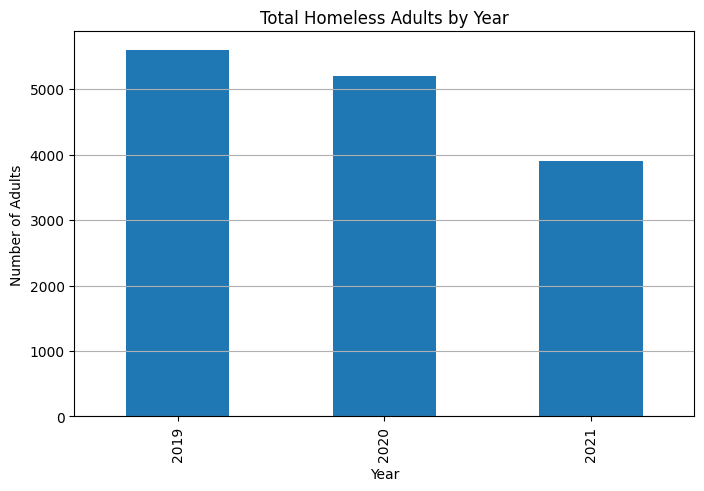

In [4]:
yearly = df.groupby('Year')['Homeless_Adults'].sum()
plt.figure(figsize=(8,5))
yearly.plot(kind='bar')
plt.title('Total Homeless Adults by Year')
plt.ylabel('Number of Adults')
plt.xlabel('Year')
plt.grid(axis='y')
plt.show()

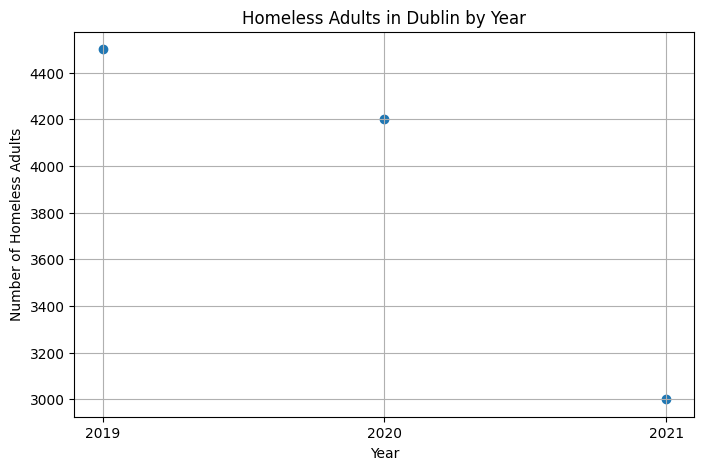

In [9]:
dublin_data = df[df['Region'] == 'Dublin']
plt.figure(figsize=(8,5))
plt.scatter(dublin_data['Year'], dublin_data['Homeless_Adults'])
plt.title('Homeless Adults in Dublin by Year')
plt.xlabel('Year')
plt.ylabel('Number of Homeless Adults')
plt.xticks(dublin_data['Year'])
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

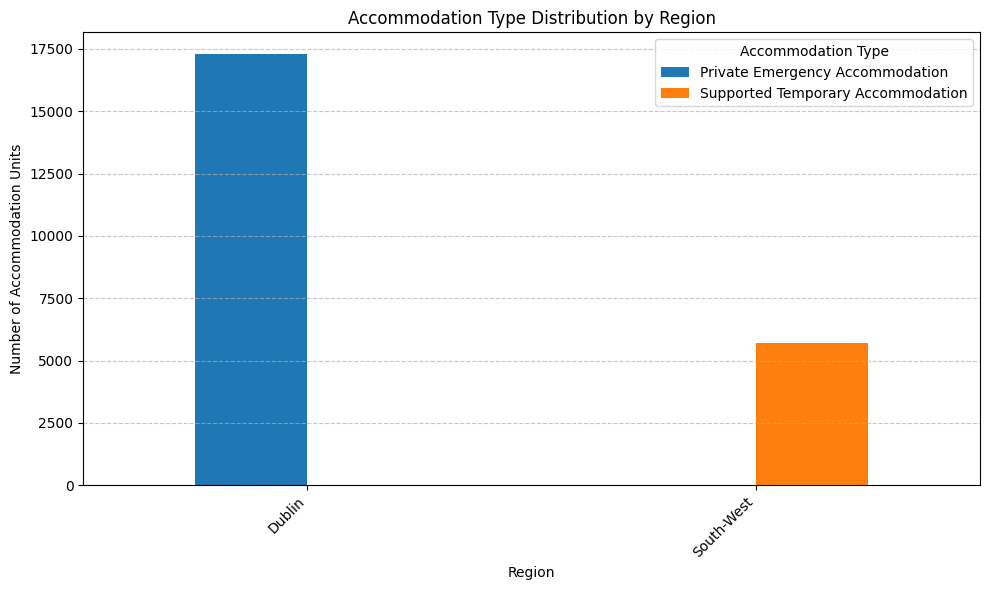

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

accommodation_by_region = df.groupby(['Region', 'Accommodation_Type'])['Count'].sum().unstack()

plt.figure(figsize=(10, 6))
accommodation_by_region.plot(kind='bar', figsize=(10, 6))
plt.title('Accommodation Type Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Accommodation Units')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Accommodation Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
accommodation_yearly = df.groupby('Year')['Count'].sum()

print('Total Homeless Adults by Year:')
display(yearly)

print('\nTotal Accommodation Units by Year:')
display(accommodation_yearly)

print('\nComparison (Accommodation Units vs. Homeless Adults):')
display(pd.DataFrame({'Homeless_Adults': yearly, 'Accommodation_Units': accommodation_yearly}))

Total Homeless Adults by Year:


,Homeless_Adults
Year,
2019,5600
2020,5200
2021,3900



Total Accommodation Units by Year:


,Count
Year,
2019,8000
2020,7700
2021,7300



Comparison (Accommodation Units vs. Homeless Adults):


,Homeless_Adults,Accommodation_Units
Year,,
2019,5600,8000
2020,5200,7700
2021,3900,7300


In [12]:
dublin_accommodation = df[df['Region'] == 'Dublin']['Accommodation_Type'].unique()
display(dublin_accommodation)

array(['Private Emergency Accommodation'], dtype=object)

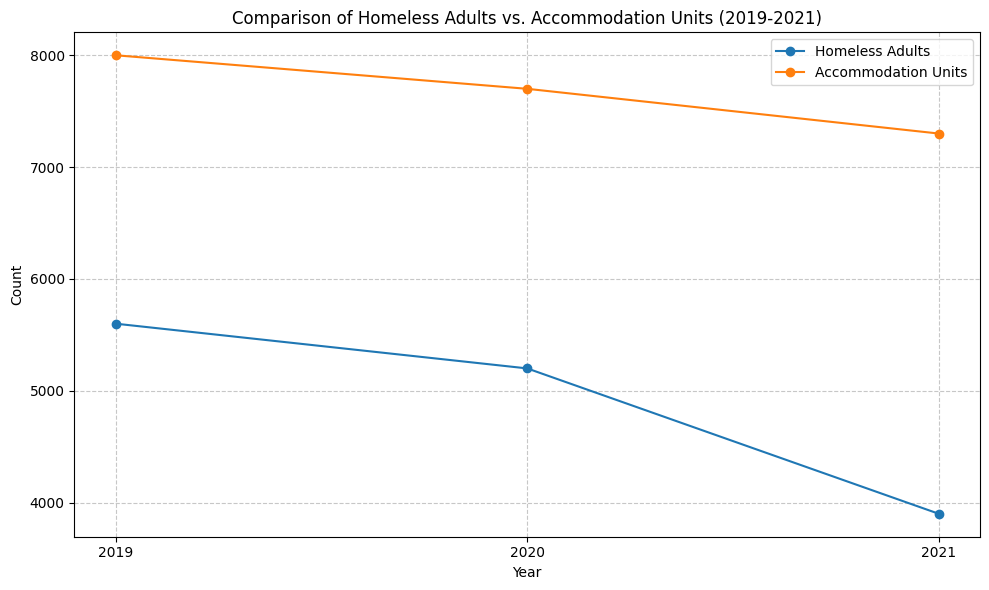

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'yearly' and 'accommodation_yearly' are calculated or re-calculated if kernel was reset
# (assuming df is still available from previous steps)
yearly = df.groupby('Year')['Homeless_Adults'].sum()
accommodation_yearly = df.groupby('Year')['Count'].sum()

comparison_df = pd.DataFrame({
    'Homeless_Adults': yearly,
    'Accommodation_Units': accommodation_yearly
})

plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df['Homeless_Adults'], marker='o', label='Homeless Adults')
plt.plot(comparison_df.index, comparison_df['Accommodation_Units'], marker='o', label='Accommodation Units')

plt.title('Comparison of Homeless Adults vs. Accommodation Units (2019-2021)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(comparison_df.index) # Ensure x-ticks are actual years
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

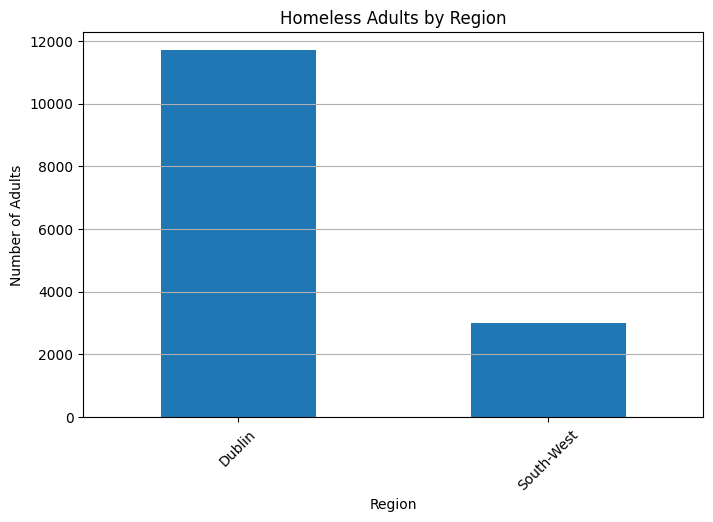

In [5]:
region_totals = df.groupby('Region')['Homeless_Adults'].sum()
plt.figure(figsize=(8,5))
region_totals.plot(kind='bar')
plt.title('Homeless Adults by Region')
plt.ylabel('Number of Adults')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()